In [ ]:
# 9월 4일

## Tensorflow을 이용한 분류(Classification)
- Binary Classification
- Multi-class Classification
- Recommend System

# Binary Classification

In [1]:
# 내 버전

import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
X,y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=0)  # 안 쪼갠 상태 n_features=2  컬럼 개수 2개
# y가 어떤 그룹인지도 정해짐  X(문제)는 좌표라 2개씩
X.shape, y.shape

((500, 2), (500,))

In [3]:
X[:5]

array([[0.37995604, 4.25122003],
       [2.23919302, 0.5121739 ],
       [0.57682105, 4.67384322],
       [2.70899127, 4.98828843],
       [3.01596092, 2.22672651]])

In [4]:
y[:5]  #array([0, 1, 0, 0, 1])  # 1행 좌표는 0그룹 / 2행은 1그룹

array([0, 1, 0, 0, 1])

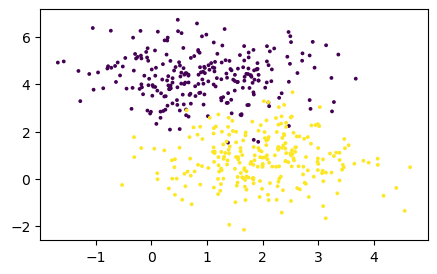

In [5]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], c=y,s=3)
plt.show()

In [6]:
# 데이터 학습용과 검증용으로 쪼개기

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 2), (100, 2), (400,), (100,))

In [7]:
# 이진 분류(계산에 의해 y가 '0과 1' 또는 '0에서 1 사이'의 숫자 2개가 각각 퍼센티지와 함께 나옴) 진행할 신경망 생성

# => 하이퍼 파라미터 만들기

model = Sequential()  # 'relu'는 음수는 0으로 변환, 양수는 그대로 보냄 => 비선형 결과가 나오게 됨(값 왜곡은 직선이 아니다)
model.add(Dense(2, input_dim=2, activation='linear'))  # 직선으로 분류할 거니 'linear'를 활성함수로 씀 linear[ˈlɪniə(r)]
# 비선형은 복잡한 문제를 풀기 좋음
model.add(Dense(64, activation='linear'))  # relu는 음수값이 없고 값을 왜곡하여 비선형으로 만드나 linear는 값 그대로 전달[직선]
model.add(Dense(32, activation='linear'))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='linear')) 
#출력층에는 activation='linear' 생략 가능(어차피 'linear'가 값을 왜곡하지 않겠단 의미이므로 없어도 동일한 의미가 됨)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 64)                192       
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2823 (11.03 KB)
Trainable params: 2823 (11.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


```
* summary 결과

Total params: 2823 (11.03 KB)  계수의 개수: 2823 
Trainable params: 2823 (11.03 KB)  학습 가능한 계수의 개수: 2823 
Non-trainable params: 0 (0.00 Byte) 학습 불가한 계수의 개수: 0 
   
2823개의 가중치가 학습돼 고차식이 만들어짐
점만 주면 만들어진 고차식이 0인지 1인지를 분류 시켜줌.  => 이진 분류 가능 원리
```

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
# 이진 분류시 손실함수는 반드시 'binary_crossentropy' 함수 사용(에러 났을 때 이 함수가 동작)
# 경사하강법 조절 알고리즘 : optimizer='adam' 사용
# metrics=['accuracy'] => 측정도구를 정확도로

In [10]:
# 추후 시각화를 위해 히스토리 객체도 생성해서 값을 넣음
hist = model.fit(X_train, y_train, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
13/13 [==============================] - 1s 24ms/step - loss: 1.6373 - accuracy: 0.7475 - val_loss: 1.1132 - val_accuracy: 0.8400
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.9830 - accuracy: 0.8650 - val_loss: 1.0644 - val_accuracy: 0.8700
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.9177 - accuracy: 0.8925 - val_loss: 1.3340 - val_accuracy: 0.8600
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 1.2633 - accuracy: 0.8575 - val_loss: 0.5262 - val_accuracy: 0.9300
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7653 - accuracy: 0.9175 - val_loss: 0.3844 - val_accuracy: 0.9400
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6422 - accuracy: 0.9125 - val_loss: 0.4438 - val_accuracy: 0.9200
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8682 - accuracy: 0.9075 - val_loss: 0.7405 - val_accuracy: 0.8900
Epoch 8/200


Epoch 59/200
13/13 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.9575 - val_loss: 0.3471 - val_accuracy: 0.9600
Epoch 60/200
13/13 [==============================] - 0s 5ms/step - loss: 0.3243 - accuracy: 0.9575 - val_loss: 0.3460 - val_accuracy: 0.9600
Epoch 61/200
13/13 [==============================] - 0s 4ms/step - loss: 0.3241 - accuracy: 0.9575 - val_loss: 0.3445 - val_accuracy: 0.9600
Epoch 62/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2656 - accuracy: 0.9550 - val_loss: 0.2221 - val_accuracy: 0.9600
Epoch 63/200
13/13 [==============================] - 0s 4ms/step - loss: 0.2249 - accuracy: 0.9625 - val_loss: 0.2263 - val_accuracy: 0.9400
Epoch 64/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1308 - accuracy: 0.9600 - val_loss: 0.2573 - val_accuracy: 0.9300
Epoch 65/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1031 - accuracy: 0.9600 - val_loss: 0.1279 - val_accuracy: 0.9500
Epoch 

13/13 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.9525 - val_loss: 0.2280 - val_accuracy: 0.9500
Epoch 117/200
13/13 [==============================] - 0s 4ms/step - loss: 0.2327 - accuracy: 0.9600 - val_loss: 0.2271 - val_accuracy: 0.9400
Epoch 118/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1640 - accuracy: 0.9650 - val_loss: 0.1377 - val_accuracy: 0.9400
Epoch 119/200
13/13 [==============================] - 0s 4ms/step - loss: 0.1355 - accuracy: 0.9600 - val_loss: 0.2510 - val_accuracy: 0.9500
Epoch 120/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1006 - accuracy: 0.9600 - val_loss: 0.1276 - val_accuracy: 0.9400
Epoch 121/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0990 - accuracy: 0.9625 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 122/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1004 - accuracy: 0.9600 - val_loss: 0.1160 - val_accuracy: 0.9400
Epoch 123/200

13/13 [==============================] - 0s 4ms/step - loss: 0.0977 - accuracy: 0.9675 - val_loss: 0.1149 - val_accuracy: 0.9400
Epoch 174/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0977 - accuracy: 0.9650 - val_loss: 0.1148 - val_accuracy: 0.9400
Epoch 175/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1004 - accuracy: 0.9650 - val_loss: 0.1199 - val_accuracy: 0.9400
Epoch 176/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1278 - accuracy: 0.9650 - val_loss: 0.0972 - val_accuracy: 0.9500
Epoch 177/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1270 - accuracy: 0.9675 - val_loss: 0.1025 - val_accuracy: 0.9500
Epoch 178/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1254 - accuracy: 0.9650 - val_loss: 0.1101 - val_accuracy: 0.9500
Epoch 179/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1053 - accuracy: 0.9625 - val_loss: 0.0968 - val_accuracy: 0.9500
Epoch 180/200

In [11]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

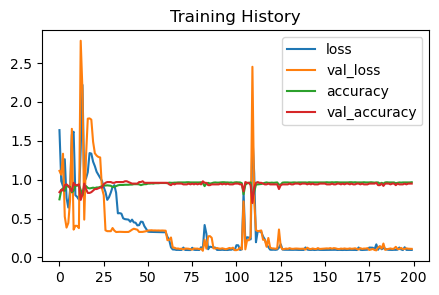

In [12]:
plt.figure(figsize=(5,3))
plt.title('Training History')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [13]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9500


[0.11092574894428253, 0.949999988079071]

In [14]:
# 추정결과 확인
pred = model.predict(X_test)
pred[:5]   # 값을 0과 1 사이로 나눠 확인해얄 듯

4/4 [==============================] - 0s 2ms/step


array([[ 0.35556138],
       [-1.0133474 ],
       [ 1.3873099 ],
       [ 1.6921921 ],
       [-0.3368928 ]], dtype=float32)

In [15]:
(pred>0.5).sum()  # 불리언을 이용해 true면 sum 함수가 계산을 해주므로=> pred>0.5의 pred는 1에 가까우므로 1그룹 34개 확인됨

48

In [16]:
(pred<=0.5).sum() #  pred<=0.5의 pred는 0에 가까우므로 => 0 그룹 확인  66개   => 둘을 합치면 100 나옴

52

In [17]:
# 모델을 사용하여 실제 값(3,3)-점 좌표-이 어떤 부류에 속하는지 측정해보세요
# 3,3의 좌표가 어느 그룹에 속하는지 확인

pred2= model.predict([[3,3]])   # array([[-0.33365235]], dtype=float32)   => 1 그룹 
(pred2>0.5).sum()

1/1 [==============================] - 0s 123ms/step


1

In [ ]:
# 삼항 연산자 이용해 참이면 1그룹 거짓이면 0그룹으로 나타내기

```
아래 코드는 삼항 연산자를 사용하여 pred 배열을 기준으로 참이면 1그룹, 거짓이면 0그룹으로 나타내는 예시:


group = np.where(pred > 0.5, 1, 0)
위 코드에서 np.where() 함수를 사용하여 pred 배열의 각 원소에 대해 조건을 검사. 
조건식은 pred > 0.5로 설정되어 있으며, 이 조건이 참인 경우 해당 원소의 값은 1로 설정됨. 
그렇지 않은 경우에는 값이 0으로 설정됩니다.

따라서 위 코드를 실행하면 group 배열에는 pred 배열의 각 원소가 기준값인 0.5보다 크면 1로, 
작거나 같으면 0으로 표시된 그룹 정보가 저장됨.

import numpy as np

# 추정결과 확인
pred = model.predict(X_test)
group = np.where(pred > 0.5, 1, 0)

print((group == 1).sum())
print((group == 0).sum())

위 코드에서 (group == #).sum() 형태로 그룹 내의 원소 개수를 확인할 수 있음. 
 # 자리에는 그룹 번호(여기서는 "1" 또는 "0")를 넣으면 됨.

실행 결과로 각각의 그룹 내 원소 개수가 출력됨.
```

In [18]:
# 삼항 연산자 사용해 각 그룹 확인1
import numpy as np

# 추정결과 확인
pred = model.predict(X_test)
group = np.where(pred > 0.5, 1, 0)

print((group == 1).sum())
print((group == 0).sum())

4/4 [==============================] - 0s 2ms/step
48
52


In [19]:
# 삼항 연산자 사용해 각 그룹 확인2
import numpy as np

# 추정결과 확인
pred = model.predict(X_test)
group = []
for val in pred:
    group.append(1 if val > 0.5 else 0)

print((np.array(group) == 1).sum())
print((np.array(group) == 0).sum())

4/4 [==============================] - 0s 2ms/step
48
52


```
삼항 연산자를 사용하여 pred 배열에서 참일 때 1 그룹으로, 거짓일 때 0 그룹으로 나타내려면 다음과 같은 방법도 있음:


grouped_pred = (pred > 0.5).astype(int)
이 코드에서 (pred > 0.5)는 pred 배열에서 각 요소가 0.5보다 큰지 여부를 나타내는 불리언 배열을 생성. 
그런 다음 .astype(int)를 사용하여 불리언 값을 정수로 변환하여 참이면 1, 거짓이면 0 그룹으로 변환. 
이렇게 하면 grouped_pred 배열에는 1과 0으로 나타난 예측 결과가 저장됨.

이제 grouped_pred 배열을 사용하여 예측 결과를 확인할 수 있음.
```

In [20]:
# 삼항 연산자 사용해 각 그룹 확인3


grouped_pred = (pred > 0.5).astype(int)
print((np.array(grouped_pred) == 1).sum())
print((np.array(grouped_pred) == 0).sum())

48
52


ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 500.

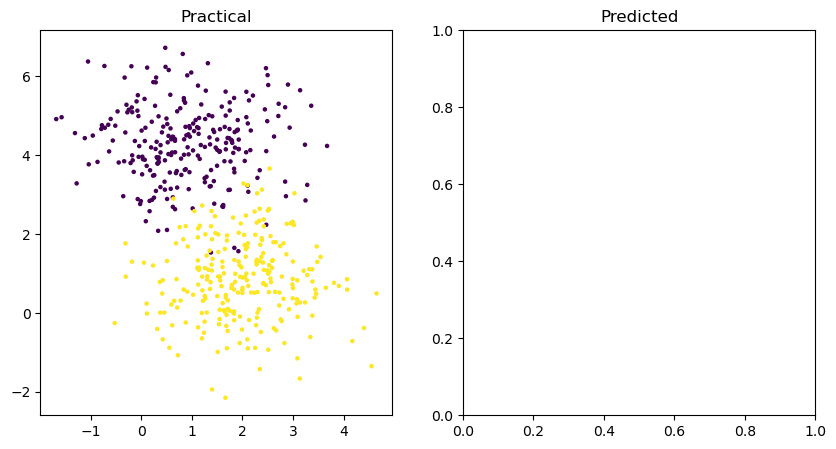

In [21]:
# 실제 분류와 모델이 추정한 분류의 비교
# 전체 데이터와 전체 데이터에 대한 추정값(분류)을 화면에 시각화해보세요
# subplot() 사용하기


plt.figure(figsize=(10,5))  # 새로운 그림(Figure) 객체를 생성. 이 함수는 기본적으로 크기가 (6.4, 4.8) 인치인 그림을 생성

# 학습 전 데이터
plt.subplot(121)
plt.title('Practical')
plt.scatter(X[:,0], X[:,1], c=y, s=5)
# 상하좌우로 차트를 나눠서 그릴 수 있는 것 중 121, 122는 상하좌우로 나누는 것.
# Figure 위에 subplot이나 차트가 그려질 때 해당 Figure의 크기 내에서 자동으로 위치가 조정
# subplot은 figure 안에 들어가는 서브 플롯(subplot)을 의미


# 학습 후 데이터

plt.subplot(122)  # 한 행을 2개로 나눠서 첫 번째 차트를 그릴 수 있는 axis 객체
plt.title('Predicted')
plt.scatter(X[:,0], X[:,1], c=pred, s=5)

plt.tight_layout()  # 서브 플롯 간격 조정
plt.show()     # 출력하면 오류남   => 이유 찾기

In [ ]:
# 위 내용 강사님 버전

In [22]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [23]:
X,y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=0)
X.shape, y.shape

((500, 2), (500,))

In [24]:
X[:5]

array([[0.37995604, 4.25122003],
       [2.23919302, 0.5121739 ],
       [0.57682105, 4.67384322],
       [2.70899127, 4.98828843],
       [3.01596092, 2.22672651]])

In [25]:
y[:5]

array([0, 1, 0, 0, 1])

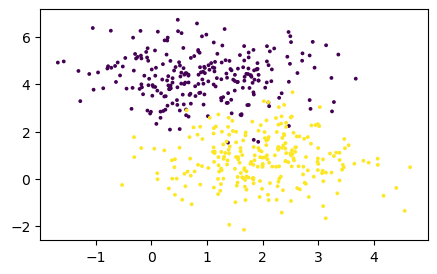

In [26]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], c=y,s=3)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 2), (100, 2), (400,), (100,))

In [28]:
model = Sequential()
model.add( Dense(2, input_dim=2, activation='linear'))
model.add(Dense(64, activation='linear'))
model.add(Dense(32, activation='linear'))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2823 (11.03 KB)
Trainable params: 2823 (11.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
hist = model.fit(X_train, y_train, epochs=200, verbose=1, 
                                  validation_data=(X_test,y_test))

Epoch 1/200
13/13 [==============================] - 1s 17ms/step - loss: 0.6857 - accuracy: 0.7575 - val_loss: 0.4312 - val_accuracy: 0.9200
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6191 - accuracy: 0.8925 - val_loss: 0.8044 - val_accuracy: 0.8400
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5419 - accuracy: 0.9100 - val_loss: 0.3341 - val_accuracy: 0.8900
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7670 - accuracy: 0.8700 - val_loss: 1.0079 - val_accuracy: 0.8200
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.9150 - val_loss: 0.2462 - val_accuracy: 0.9800
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.9325 - val_loss: 0.2706 - val_accuracy: 0.9300
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1794 - accuracy: 0.9275 - val_loss: 0.2613 - val_accuracy: 0.9400
Epoch 8/200


Epoch 59/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1013 - accuracy: 0.9600 - val_loss: 0.1216 - val_accuracy: 0.9400
Epoch 60/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1008 - accuracy: 0.9600 - val_loss: 0.1120 - val_accuracy: 0.9400
Epoch 61/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0996 - accuracy: 0.9650 - val_loss: 0.1092 - val_accuracy: 0.9400
Epoch 62/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.9625 - val_loss: 0.1142 - val_accuracy: 0.9400
Epoch 63/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0987 - accuracy: 0.9650 - val_loss: 0.1106 - val_accuracy: 0.9400
Epoch 64/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0996 - accuracy: 0.9650 - val_loss: 0.1163 - val_accuracy: 0.9500
Epoch 65/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0981 - accuracy: 0.9650 - val_loss: 0.1133 - val_accuracy: 0.9500
Epoch 

13/13 [==============================] - 0s 4ms/step - loss: 0.0974 - accuracy: 0.9650 - val_loss: 0.1122 - val_accuracy: 0.9500
Epoch 117/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0972 - accuracy: 0.9650 - val_loss: 0.1119 - val_accuracy: 0.9500
Epoch 118/200
13/13 [==============================] - 0s 4ms/step - loss: 0.0970 - accuracy: 0.9650 - val_loss: 0.1100 - val_accuracy: 0.9500
Epoch 119/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0969 - accuracy: 0.9650 - val_loss: 0.1113 - val_accuracy: 0.9500
Epoch 120/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0979 - accuracy: 0.9650 - val_loss: 0.1128 - val_accuracy: 0.9400
Epoch 121/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1018 - accuracy: 0.9650 - val_loss: 0.1135 - val_accuracy: 0.9400
Epoch 122/200
13/13 [==============================] - 0s 4ms/step - loss: 0.1496 - accuracy: 0.9450 - val_loss: 0.2061 - val_accuracy: 0.9100
Epoch 123/200

13/13 [==============================] - 0s 5ms/step - loss: 0.0992 - accuracy: 0.9600 - val_loss: 0.1321 - val_accuracy: 0.9300
Epoch 174/200
13/13 [==============================] - 0s 10ms/step - loss: 0.1031 - accuracy: 0.9650 - val_loss: 0.1160 - val_accuracy: 0.9400
Epoch 175/200
13/13 [==============================] - 0s 23ms/step - loss: 0.0994 - accuracy: 0.9675 - val_loss: 0.1089 - val_accuracy: 0.9500
Epoch 176/200
13/13 [==============================] - 0s 12ms/step - loss: 0.0980 - accuracy: 0.9625 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 177/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0968 - accuracy: 0.9650 - val_loss: 0.1069 - val_accuracy: 0.9500
Epoch 178/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0984 - accuracy: 0.9675 - val_loss: 0.1132 - val_accuracy: 0.9500
Epoch 179/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0999 - accuracy: 0.9525 - val_loss: 0.1417 - val_accuracy: 0.9300
Epoch 180

In [31]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

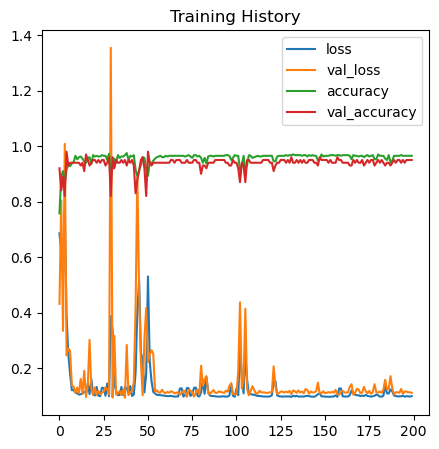

In [35]:
# 실제 분류와 모델이 추정한 분류의 비교(X, y)
# subplot() 사용하기

plt.figure(figsize=(5,5)) # 새로운 그림(Figure) 객체를 생성. 이 함수는 기본적으로 크기가 (6.4, 4.8) 인치인 그림을 생성
# 상하좌우로 차트를 나눠서 그릴 수 있는 것 중 121, 122는 상하좌우로 나누는 것.
# Figure 위에 subplot이나 차트가 그려질 때 해당 Figure의 크기 내에서 자동으로 위치가 조정
# subplot은 figure 안에 들어가는 서브 플롯(subplot)을 의미

plt.title('Training History')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [36]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9500


[0.11047495901584625, 0.949999988079071]

In [37]:
pred = model.predict(X_test)
pred[:5]

4/4 [==============================] - 0s 2ms/step


array([[ 0.35328704],
       [-0.9764522 ],
       [ 1.3769017 ],
       [ 1.6585815 ],
       [-0.31653357]], dtype=float32)

In [38]:
(pred > 0.5).sum(), (pred <= 0.5).sum()

(48, 52)

In [39]:
# 모델을 사용하여 실제 값(3,3)이 어떤 부류에 속하는지 확인해보세요.
pred = model.predict([[3,3]])
(pred>0.5).sum()

1/1 [==============================] - 0s 112ms/step


1

In [ ]:
# 전체 데이터와 전체 데이터에 대한 추정값(분류)을 화면에 시각화해보세요

In [40]:
import numpy as np

pred = model.predict(X)  # 전체 데이터에 대한 모델의 분류 추정값

pred_2 = pred>0.5
pred_2 = np.array(pred_2, dtype=int)
pred_2[:5]

16/16 [==============================] - 0s 1ms/step


array([[0],
       [1],
       [0],
       [0],
       [1]])

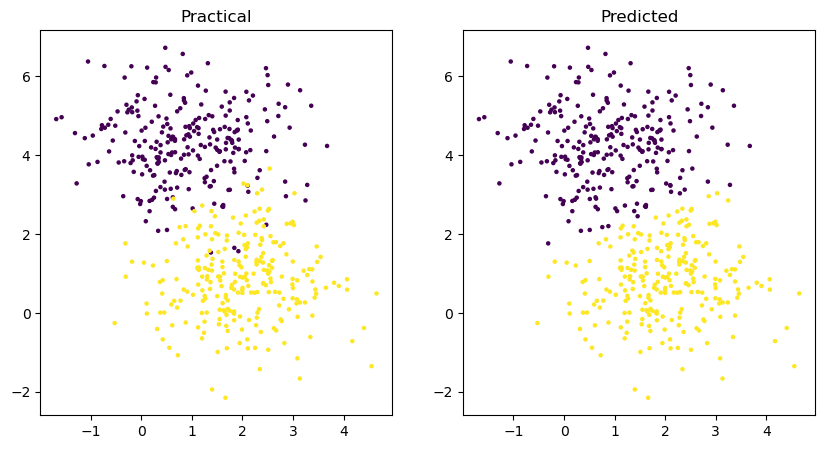

In [41]:
# 실제 분류와 모델이 추정한 분류의 비교(X, y)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Practical')
plt.scatter(X[:,0], X[:,1], c=y, s=5)

plt.subplot(122)
plt.title('Predicted')
plt.scatter(X[:,0], X[:,1], c=pred_2, s=5)

plt.show()

In [ ]:
# 동영상 보고 위 내용 시그모이드 버전도 넣어야 함

In [42]:
# 'sigmoid' 이용해 이진 분류(계산에 의해 y가 '0과 1' 또는 '0에서 1 사이'의 숫자 2개가 각각 퍼센티지와 함께 나옴)신경망 생성

# => 하이퍼 파라미터 만들기

model = Sequential()  # 'relu'는 음수는 0으로 변환, 양수는 그대로 보냄 => 비선형 결과가 나오게 됨(값 왜곡은 직선이 아니다)
model.add(Dense(2, input_dim=2, activation='linear'))  # 직선으로 분류할 거니 'linear'를 활성함수로 씀 linear[ˈlɪniə(r)]
# 비선형은 복잡한 문제를 풀기 좋음
model.add(Dense(64, activation='linear'))
model.add(Dense(32, activation='linear'))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='linear')) 
#출력층: activation='linear' 생략 가능(어차피 'linear'가 값을 왜곡하지 않겠단 의미이므로 없어도 동일한 의미가 됨)
# 회귀와 동일하나 분류는 두 가지 값을 가공해 확인해야 하므로 
# 위의 내용처럼 pred> 0.5, pred<=0.5로 확인 방법 없이도 0과 1 경계범의 지정을 시스템으로 처리하게끔 해줌 => 'sigmoid' 함수 이용
model.add(Dense(1, activation='sigmoid')) 

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [44]:
hist = model.fit(X_train, y_train, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
13/13 [==============================] - 1s 23ms/step - loss: 0.3973 - accuracy: 0.8375 - val_loss: 0.3199 - val_accuracy: 0.8100
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.8900 - val_loss: 0.2604 - val_accuracy: 0.8800
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1948 - accuracy: 0.9125 - val_loss: 0.2020 - val_accuracy: 0.9100
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1653 - accuracy: 0.9300 - val_loss: 0.1604 - val_accuracy: 0.9400
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.1466 - accuracy: 0.9300 - val_loss: 0.1434 - val_accuracy: 0.9500
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1385 - accuracy: 0.9425 - val_loss: 0.1322 - val_accuracy: 0.9500
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1340 - accuracy: 0.9425 - val_loss: 0.1273 - val_accuracy: 0.9500
Epoch 8/200


Epoch 59/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0960 - accuracy: 0.9675 - val_loss: 0.1063 - val_accuracy: 0.9600
Epoch 60/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0967 - accuracy: 0.9650 - val_loss: 0.1021 - val_accuracy: 0.9600
Epoch 61/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0956 - accuracy: 0.9675 - val_loss: 0.1102 - val_accuracy: 0.9600
Epoch 62/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0974 - accuracy: 0.9675 - val_loss: 0.1072 - val_accuracy: 0.9600
Epoch 63/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0960 - accuracy: 0.9675 - val_loss: 0.1126 - val_accuracy: 0.9600
Epoch 64/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0959 - accuracy: 0.9675 - val_loss: 0.1086 - val_accuracy: 0.9600
Epoch 65/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0971 - accuracy: 0.9700 - val_loss: 0.1100 - val_accuracy: 0.9600
Epoch 

13/13 [==============================] - 0s 7ms/step - loss: 0.0976 - accuracy: 0.9650 - val_loss: 0.1068 - val_accuracy: 0.9600
Epoch 117/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0956 - accuracy: 0.9675 - val_loss: 0.1056 - val_accuracy: 0.9600
Epoch 118/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0955 - accuracy: 0.9675 - val_loss: 0.1155 - val_accuracy: 0.9400
Epoch 119/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0951 - accuracy: 0.9675 - val_loss: 0.0997 - val_accuracy: 0.9600
Epoch 120/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0971 - accuracy: 0.9700 - val_loss: 0.1055 - val_accuracy: 0.9600
Epoch 121/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0948 - accuracy: 0.9675 - val_loss: 0.1043 - val_accuracy: 0.9600
Epoch 122/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0941 - accuracy: 0.9675 - val_loss: 0.1075 - val_accuracy: 0.9600
Epoch 123/200

13/13 [==============================] - 0s 6ms/step - loss: 0.0960 - accuracy: 0.9625 - val_loss: 0.1143 - val_accuracy: 0.9500
Epoch 174/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0952 - accuracy: 0.9725 - val_loss: 0.0981 - val_accuracy: 0.9600
Epoch 175/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0953 - accuracy: 0.9700 - val_loss: 0.1188 - val_accuracy: 0.9400
Epoch 176/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0977 - accuracy: 0.9700 - val_loss: 0.1028 - val_accuracy: 0.9600
Epoch 177/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0962 - accuracy: 0.9675 - val_loss: 0.1002 - val_accuracy: 0.9600
Epoch 178/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0954 - accuracy: 0.9675 - val_loss: 0.1159 - val_accuracy: 0.9400
Epoch 179/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0944 - accuracy: 0.9725 - val_loss: 0.1030 - val_accuracy: 0.9600
Epoch 180/200

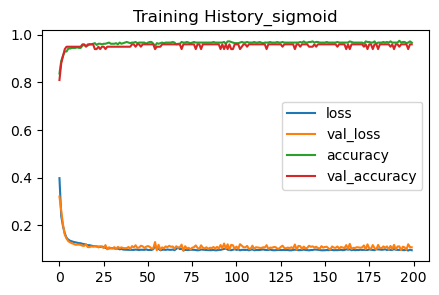

In [47]:
plt.figure(figsize=(5,3))

plt.title('Training History_sigmoid')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')   # 'val_loss' 학습 안 된 데이터
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')  # 'val_accuracy' 학습 안 된 데이터

plt.legend()
plt.show()

# 'loss'와 'val_loss'가 의미하는 차이

# - 'loss': 실제 값과 추정한 값을 비교한 값
# - 'val_loss': 지금 추정한 값(학습을 통해)과 우리가 준  validation_data의 test데이터(검증용-외부 데이터로 생각)와 차이나는 값  

In [48]:
# 추정결과 확인
pred = model.predict(X_test)
pred[:5]   # 처음과 달리 0과 1 사이로만 값이 나오게 됨  => sigmoid 덕분

4/4 [==============================] - 0s 2ms/step


array([[2.7122796e-01],
       [1.8952891e-05],
       [9.9913800e-01],
       [9.9985743e-01],
       [2.7035049e-03]], dtype=float32)

In [49]:
(pred>0.5).sum(), (pred<=0.5).sum()

(49, 51)

In [50]:
import numpy as np

pred = model.predict(X) # 전체 데이터에 대한 모델의 분류 추정값
pred_2=pred>0.5
pred_2 = np.array(pred_2, dtype=int) # 불리언 값을 이렇게 int로 바꿔주면 true는 1, false는 0으로 바꿔줌
pred_2[:5]

16/16 [==============================] - 0s 2ms/step


array([[0],
       [1],
       [0],
       [0],
       [1]])

ValueError: 'c' argument has 500 elements, which is inconsistent with 'x' and 'y' with size 100.

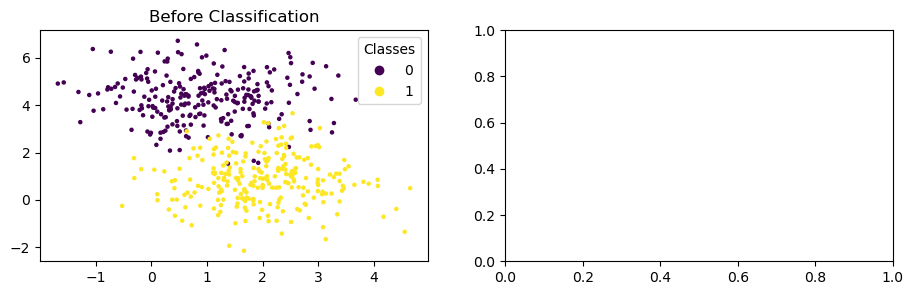

In [53]:
# 실제 분류와 모델이 추정한 분류의 비교
# subplot() 사용하기


fig = plt.figure(figsize=(11, 3))  # 새로운 그림(Figure) 객체를 생성. 이 함수는 기본적으로 크기가 (6.4, 4.8) 인치인 그림을 생성
# 상하좌우로 차트를 나눠서 그릴 수 있는 것 중 121, 122는 상하좌우로 나누는 것.
# Figure 위에 subplot이나 차트가 그려질 때 해당 Figure의 크기 내에서 자동으로 위치가 조정
# subplot은 figure 안에 들어가는 서브 플롯(subplot)을 의미


# 학습 전 데이터
ax1 = fig.add_subplot(121)  # 한 행을 2개로 나눠서 첫 번째 차트를 그릴 수 있는 axis 객체
scatter1 = ax1.scatter(X[:,0], X[:,1], s=5, c=y, label='before_data')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")

#  bbox_to_anchor=(1.05, 1), bbox_transform=ax.transAxe => 범례 사이즈 조정

#ax1.add_artist(legend1)  # legend를 subplot에 추가
ax1.set_title("Before Classification")  # 서브 플롯에 제목 추가


# 학습 후 데이터

ax2 = fig.add_subplot(122)  # 한 행을 2개로 나눠서 두 번째 차트를 그릴 수 있는 axis 객체
scatter2 = ax2.scatter(X_test[:,0], X_test[:,1], s=5, c=pred, label=pred)
legend2 = ax2.legend(*scatter2.legend_elements(), title="Predicted Classes")
#ax2.add_artist(legend2)  #  범례(legend2)를 서브 플롯 ax2에 직접 추가하는 것을 의미. 범례가 서브 플롯 내에서 독립적으로 위치
ax2.set_title("Predicted Classification")  # 서브 플롯에 제목 추가


plt.tight_layout()  # 서브 플롯 간격 조정
plt.show()    # 출력시 오류 나고 있음 추후 동영상 보고 확인확인

In [ ]:
# 위 내용 강사님 버전

In [54]:
# relu 이용 이진 분류(계산에 의해 y가 '0과 1' 또는 '0에서 1 사이'의 숫자 2개가 각각 퍼센티지와 함께 나옴) 진행할 신경망 생성

# => 하이퍼 파라미터 만들기

model = Sequential()  # 'relu'는 음수는 0으로 변환, 양수는 그대로 보냄 => 비선형 결과가 나오게 됨(값 왜곡은 직선이 아니다)
model.add(Dense(2, input_dim=2, activation='relu'))  # 직선으로 분류할 거니 'linear'를 활성함수로 씀 linear[ˈlɪniə(r)]
# 비선형은 복잡한 문제를 풀기 좋음
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear')) 
#출력층: activation='linear' 생략 가능(어차피 'linear'가 값을 왜곡하지 않겠단 의미이므로 없어도 동일한 의미가 됨)

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [56]:
hist = model.fit(X_train, y_train, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
13/13 [==============================] - 1s 22ms/step - loss: 0.9496 - accuracy: 0.3700 - val_loss: 0.7362 - val_accuracy: 0.5600
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6385 - accuracy: 0.6575 - val_loss: 0.4925 - val_accuracy: 0.7600
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.4354 - accuracy: 0.7875 - val_loss: 0.3607 - val_accuracy: 0.8400
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.8550 - val_loss: 0.4017 - val_accuracy: 0.8700
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2706 - accuracy: 0.8925 - val_loss: 0.3338 - val_accuracy: 0.9100
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2317 - accuracy: 0.9100 - val_loss: 0.3140 - val_accuracy: 0.9100
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2047 - accuracy: 0.9175 - val_loss: 0.1811 - val_accuracy: 0.9400
Epoch 8/200


Epoch 59/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0953 - accuracy: 0.9675 - val_loss: 0.1205 - val_accuracy: 0.9500
Epoch 60/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0948 - accuracy: 0.9675 - val_loss: 0.1247 - val_accuracy: 0.9500
Epoch 61/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0948 - accuracy: 0.9675 - val_loss: 0.1229 - val_accuracy: 0.9500
Epoch 62/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0946 - accuracy: 0.9675 - val_loss: 0.1217 - val_accuracy: 0.9500
Epoch 63/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0945 - accuracy: 0.9675 - val_loss: 0.1202 - val_accuracy: 0.9500
Epoch 64/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0948 - accuracy: 0.9675 - val_loss: 0.1255 - val_accuracy: 0.9500
Epoch 65/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0948 - accuracy: 0.9675 - val_loss: 0.1348 - val_accuracy: 0.9400
Epoch 

13/13 [==============================] - 0s 5ms/step - loss: 0.0882 - accuracy: 0.9700 - val_loss: 0.2581 - val_accuracy: 0.9300
Epoch 117/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0930 - accuracy: 0.9675 - val_loss: 0.1176 - val_accuracy: 0.9400
Epoch 118/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0870 - accuracy: 0.9675 - val_loss: 0.1595 - val_accuracy: 0.9400
Epoch 119/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0874 - accuracy: 0.9675 - val_loss: 0.1265 - val_accuracy: 0.9400
Epoch 120/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0884 - accuracy: 0.9675 - val_loss: 0.1256 - val_accuracy: 0.9400
Epoch 121/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0890 - accuracy: 0.9700 - val_loss: 0.2585 - val_accuracy: 0.9300
Epoch 122/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0884 - accuracy: 0.9700 - val_loss: 0.1373 - val_accuracy: 0.9400
Epoch 123/200

13/13 [==============================] - 0s 6ms/step - loss: 0.0864 - accuracy: 0.9675 - val_loss: 0.2050 - val_accuracy: 0.9500
Epoch 174/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0852 - accuracy: 0.9725 - val_loss: 0.2468 - val_accuracy: 0.9500
Epoch 175/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0846 - accuracy: 0.9675 - val_loss: 0.2475 - val_accuracy: 0.9500
Epoch 176/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0854 - accuracy: 0.9675 - val_loss: 0.2468 - val_accuracy: 0.9500
Epoch 177/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0866 - accuracy: 0.9675 - val_loss: 0.2479 - val_accuracy: 0.9500
Epoch 178/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0844 - accuracy: 0.9700 - val_loss: 0.2459 - val_accuracy: 0.9400
Epoch 179/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0850 - accuracy: 0.9700 - val_loss: 0.2429 - val_accuracy: 0.9400
Epoch 180/200

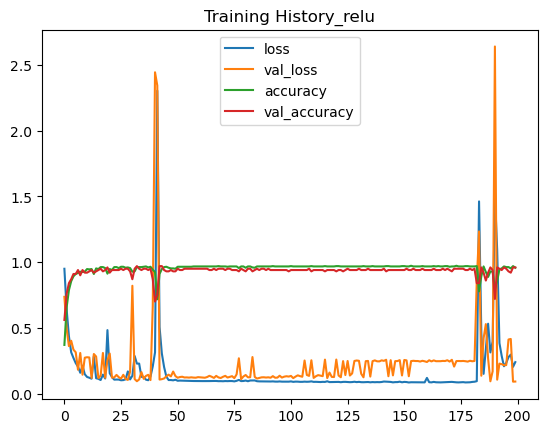

In [57]:
plt.title('Training History_relu')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')   # 'val_loss' 학습 안 된 데이터
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')  # 'val_accuracy' 학습 안 된 데이터

plt.legend()
plt.show()

In [58]:
# 추정결과 확인
pred = model.predict(X_test)
pred[:5] 

4/4 [==============================] - 0s 2ms/step


array([[ 0.58033645],
       [-1.0180395 ],
       [ 1.9618723 ],
       [ 2.5571446 ],
       [-0.51963633]], dtype=float32)

In [59]:
(pred>0.5).sum(), (pred<=0.5).sum()

(53, 47)

In [60]:
import numpy as np

pred = model.predict(X) # 전체 데이터에 대한 모델의 분류 추정값
pred_2=pred>0.5
pred_2 = np.array(pred_2, dtype=int) # 불리언 값을 이렇게 int로 바꿔주면 true는 1, false는 0으로 바꿔줌
pred_2[:5]

16/16 [==============================] - 0s 2ms/step


array([[0],
       [1],
       [0],
       [0],
       [1]])

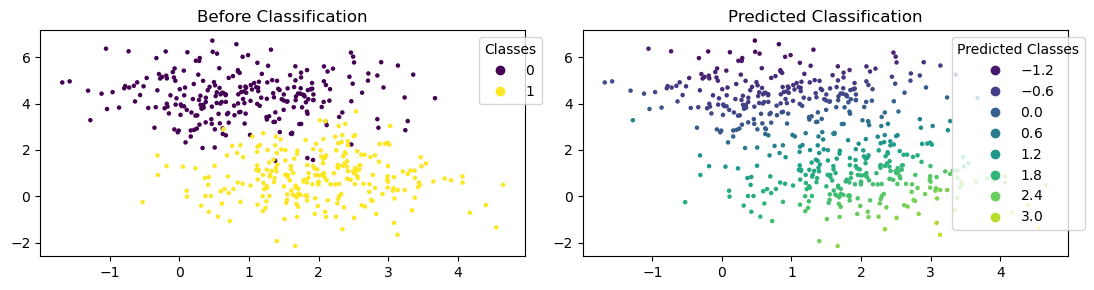

In [61]:
# 실제 분류와 모델이 추정한 분류의 비교
# subplot() 사용하기


fig = plt.figure(figsize=(11, 3))  # 새로운 그림(Figure) 객체를 생성. 이 함수는 기본적으로 크기가 (6.4, 4.8) 인치인 그림을 생성
# 상하좌우로 차트를 나눠서 그릴 수 있는 것 중 121, 122는 상하좌우로 나누는 것.
# Figure 위에 subplot이나 차트가 그려질 때 해당 Figure의 크기 내에서 자동으로 위치가 조정
# subplot은 figure 안에 들어가는 서브 플롯(subplot)을 의미


# 학습 전 데이터
ax1 = fig.add_subplot(121)  # 한 행을 2개로 나눠서 첫 번째 차트를 그릴 수 있는 axis 객체
scatter1 = ax1.scatter(X[:,0], X[:,1], s=5, c=y, label='before_data')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes", loc="upper right", bbox_to_anchor=(1.05, 1), bbox_transform=ax1.transAxes)

#  bbox_to_anchor=(1.05, 1), bbox_transform=ax.transAxe => 범례 사이즈 조정

#ax1.add_artist(legend1)  # legend를 subplot에 추가
ax1.set_title("Before Classification")  # 서브 플롯에 제목 추가


# 학습 후 데이터

ax2 = fig.add_subplot(122)  # 한 행을 2개로 나눠서 두 번째 차트를 그릴 수 있는 axis 객체
scatter2 = ax2.scatter(X[:,0], X[:,1], s=5, c=pred, label=pred)
legend2 = ax2.legend(*scatter2.legend_elements(), title="Predicted Classes", loc="upper right", bbox_to_anchor=(1.05, 1), bbox_transform=ax2.transAxes)
#ax2.add_artist(legend2)  #  범례(legend2)를 서브 플롯 ax2에 직접 추가하는 것을 의미. 범례가 서브 플롯 내에서 독립적으로 위치
ax2.set_title("Predicted Classification")  # 서브 플롯에 제목 추가


plt.tight_layout()  # 서브 플롯 간격 조정
plt.show()

In [ ]:
# 위 내용 강사님 버전

In [ ]:
# 도넛 모양의 데이터 분류하기

# 비선형 데이터에 대해 이진분류 적용하기
- 데이터가 비선형이므로 activation=linear 가 아닌 activation=relu 으로 설정
- 분류의 갯수(클래스의 수)가 2개이므로 이진 분류 적용
- 이진분류 출력함수 : sigmoid
- 이진분류 손실함수 : binary_crossentropy

In [62]:
#from sklearn.datasets import make_moons
from sklearn.datasets import make_gaussian_quantiles  # 도넛 모양의 데이터 만들어줌

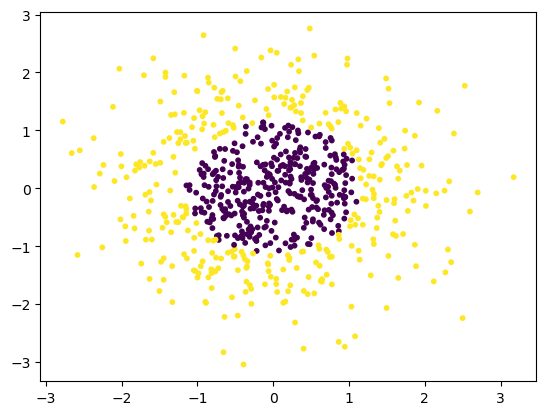

In [63]:
import matplotlib.pyplot as plt
X, y = make_gaussian_quantiles(n_samples=700, n_features=2, n_classes=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=10)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560, 2), (140, 2), (560,), (140,))

In [65]:
model = Sequential() 
model.add(Dense(2, input_dim=2, activation='relu'))
model.add( Dense(128,  activation='relu') )
model.add( Dense(64,  activation='relu') )
model.add( Dense(32,  activation='relu') )
model.add( Dense(16,  activation='relu') )
model.add( Dense(8,  activation='relu') )
model.add( Dense(4,  activation='relu') )
model.add( Dense(2,  activation='relu') )
model.add(Dense(1, activation='sigmoid')) 

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2)                 6         
                                                                 
 dense_22 (Dense)            (None, 128)               384       
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dense_27 (Dense)            (None, 4)                

In [67]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 이진 분류시 반드시 'binary_crossentropy'

In [68]:
hist = model.fit(X_train, y_train, epochs=500, verbose=1,
                                validation_data=(X_test, y_test))

Epoch 1/500
18/18 [==============================] - 2s 15ms/step - loss: 0.6851 - accuracy: 0.5518 - val_loss: 0.6757 - val_accuracy: 0.5214
Epoch 2/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6650 - accuracy: 0.5411 - val_loss: 0.6492 - val_accuracy: 0.5571
Epoch 3/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6434 - accuracy: 0.5786 - val_loss: 0.6300 - val_accuracy: 0.5786
Epoch 4/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6222 - accuracy: 0.6071 - val_loss: 0.6119 - val_accuracy: 0.6000
Epoch 5/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6012 - accuracy: 0.6554 - val_loss: 0.5918 - val_accuracy: 0.6643
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.5839 - accuracy: 0.6804 - val_loss: 0.5646 - val_accuracy: 0.6786
Epoch 7/500
18/18 [==============================] - 0s 5ms/step - loss: 0.5665 - accuracy: 0.7125 - val_loss: 0.5493 - val_accuracy: 0.7000
Epoch 8/500


Epoch 59/500
18/18 [==============================] - 0s 5ms/step - loss: 0.4202 - accuracy: 0.7589 - val_loss: 0.4616 - val_accuracy: 0.7000
Epoch 60/500
18/18 [==============================] - 0s 5ms/step - loss: 0.4140 - accuracy: 0.7643 - val_loss: 0.4474 - val_accuracy: 0.7214
Epoch 61/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4258 - accuracy: 0.7625 - val_loss: 0.4452 - val_accuracy: 0.7143
Epoch 62/500
18/18 [==============================] - 0s 5ms/step - loss: 0.4221 - accuracy: 0.7589 - val_loss: 0.4438 - val_accuracy: 0.7143
Epoch 63/500
18/18 [==============================] - 0s 4ms/step - loss: 0.3896 - accuracy: 0.7786 - val_loss: 0.4238 - val_accuracy: 0.7214
Epoch 64/500
18/18 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.7786 - val_loss: 0.4157 - val_accuracy: 0.7357
Epoch 65/500
18/18 [==============================] - 0s 4ms/step - loss: 0.3816 - accuracy: 0.7750 - val_loss: 0.4153 - val_accuracy: 0.7357
Epoch 

18/18 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.7857 - val_loss: 0.3770 - val_accuracy: 0.7214
Epoch 117/500
18/18 [==============================] - 0s 4ms/step - loss: 0.3490 - accuracy: 0.7750 - val_loss: 0.3786 - val_accuracy: 0.7214
Epoch 118/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3401 - accuracy: 0.7857 - val_loss: 0.3777 - val_accuracy: 0.7214
Epoch 119/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3365 - accuracy: 0.7839 - val_loss: 0.3878 - val_accuracy: 0.7214
Epoch 120/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3400 - accuracy: 0.7821 - val_loss: 0.3828 - val_accuracy: 0.7214
Epoch 121/500
18/18 [==============================] - 0s 4ms/step - loss: 0.3390 - accuracy: 0.7821 - val_loss: 0.3829 - val_accuracy: 0.7143
Epoch 122/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3372 - accuracy: 0.7821 - val_loss: 0.3770 - val_accuracy: 0.7214
Epoch 123/500

18/18 [==============================] - 0s 6ms/step - loss: 0.3303 - accuracy: 0.7821 - val_loss: 0.3781 - val_accuracy: 0.7143
Epoch 174/500
18/18 [==============================] - 0s 7ms/step - loss: 0.3316 - accuracy: 0.7821 - val_loss: 0.3774 - val_accuracy: 0.7214
Epoch 175/500
18/18 [==============================] - 0s 6ms/step - loss: 0.3291 - accuracy: 0.7875 - val_loss: 0.3710 - val_accuracy: 0.7214
Epoch 176/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3290 - accuracy: 0.7821 - val_loss: 0.3866 - val_accuracy: 0.7071
Epoch 177/500
18/18 [==============================] - 0s 4ms/step - loss: 0.3413 - accuracy: 0.7768 - val_loss: 0.3752 - val_accuracy: 0.7214
Epoch 178/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3290 - accuracy: 0.7821 - val_loss: 0.3807 - val_accuracy: 0.7143
Epoch 179/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3327 - accuracy: 0.7839 - val_loss: 0.3675 - val_accuracy: 0.7214
Epoch 180/500

18/18 [==============================] - 0s 6ms/step - loss: 0.3304 - accuracy: 0.7821 - val_loss: 0.3800 - val_accuracy: 0.7214
Epoch 231/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3326 - accuracy: 0.7821 - val_loss: 0.3750 - val_accuracy: 0.7214
Epoch 232/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3443 - accuracy: 0.7768 - val_loss: 0.3759 - val_accuracy: 0.7214
Epoch 233/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3397 - accuracy: 0.7768 - val_loss: 0.3728 - val_accuracy: 0.7214
Epoch 234/500
18/18 [==============================] - 0s 4ms/step - loss: 0.3265 - accuracy: 0.7839 - val_loss: 0.3700 - val_accuracy: 0.7214
Epoch 235/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3296 - accuracy: 0.7821 - val_loss: 0.3652 - val_accuracy: 0.7286
Epoch 236/500
18/18 [==============================] - 0s 6ms/step - loss: 0.3313 - accuracy: 0.7786 - val_loss: 0.3737 - val_accuracy: 0.7143
Epoch 237/500

18/18 [==============================] - 0s 5ms/step - loss: 0.3172 - accuracy: 0.7982 - val_loss: 0.3687 - val_accuracy: 0.7786
Epoch 288/500
18/18 [==============================] - 0s 6ms/step - loss: 0.3127 - accuracy: 0.8000 - val_loss: 0.3673 - val_accuracy: 0.7714
Epoch 289/500
18/18 [==============================] - 0s 7ms/step - loss: 0.3144 - accuracy: 0.8036 - val_loss: 0.3649 - val_accuracy: 0.7857
Epoch 290/500
18/18 [==============================] - 0s 8ms/step - loss: 0.3120 - accuracy: 0.8000 - val_loss: 0.3749 - val_accuracy: 0.7714
Epoch 291/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.8036 - val_loss: 0.3790 - val_accuracy: 0.7714
Epoch 292/500
18/18 [==============================] - 0s 4ms/step - loss: 0.3121 - accuracy: 0.7982 - val_loss: 0.3738 - val_accuracy: 0.7714
Epoch 293/500
18/18 [==============================] - 0s 4ms/step - loss: 0.3106 - accuracy: 0.8018 - val_loss: 0.3749 - val_accuracy: 0.7714
Epoch 294/500

18/18 [==============================] - 0s 5ms/step - loss: 0.3089 - accuracy: 0.8036 - val_loss: 0.3808 - val_accuracy: 0.7643
Epoch 345/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.8054 - val_loss: 0.3848 - val_accuracy: 0.7643
Epoch 346/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3100 - accuracy: 0.8000 - val_loss: 0.3749 - val_accuracy: 0.7714
Epoch 347/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3102 - accuracy: 0.8054 - val_loss: 0.4047 - val_accuracy: 0.7714
Epoch 348/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3109 - accuracy: 0.7982 - val_loss: 0.3704 - val_accuracy: 0.7786
Epoch 349/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3123 - accuracy: 0.8000 - val_loss: 0.3723 - val_accuracy: 0.7714
Epoch 350/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3376 - accuracy: 0.7929 - val_loss: 0.3909 - val_accuracy: 0.7643
Epoch 351/500

18/18 [==============================] - 0s 7ms/step - loss: 0.3003 - accuracy: 0.8107 - val_loss: 0.3921 - val_accuracy: 0.7714
Epoch 402/500
18/18 [==============================] - 0s 5ms/step - loss: 0.2987 - accuracy: 0.8018 - val_loss: 0.3588 - val_accuracy: 0.7786
Epoch 403/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3146 - accuracy: 0.7946 - val_loss: 0.3808 - val_accuracy: 0.7929
Epoch 404/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3001 - accuracy: 0.8054 - val_loss: 0.3992 - val_accuracy: 0.7786
Epoch 405/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3065 - accuracy: 0.8054 - val_loss: 0.3758 - val_accuracy: 0.7857
Epoch 406/500
18/18 [==============================] - 0s 5ms/step - loss: 0.2957 - accuracy: 0.8089 - val_loss: 0.3845 - val_accuracy: 0.7714
Epoch 407/500
18/18 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.8071 - val_loss: 0.3852 - val_accuracy: 0.7857
Epoch 408/500

18/18 [==============================] - 0s 5ms/step - loss: 0.2949 - accuracy: 0.8107 - val_loss: 0.3763 - val_accuracy: 0.7929
Epoch 459/500
18/18 [==============================] - 0s 5ms/step - loss: 0.2956 - accuracy: 0.8089 - val_loss: 0.3648 - val_accuracy: 0.8000
Epoch 460/500
18/18 [==============================] - 0s 6ms/step - loss: 0.2961 - accuracy: 0.8107 - val_loss: 0.3731 - val_accuracy: 0.7929
Epoch 461/500
18/18 [==============================] - 0s 7ms/step - loss: 0.2940 - accuracy: 0.8125 - val_loss: 0.3722 - val_accuracy: 0.7929
Epoch 462/500
18/18 [==============================] - 0s 7ms/step - loss: 0.3030 - accuracy: 0.8089 - val_loss: 0.3847 - val_accuracy: 0.7786
Epoch 463/500
18/18 [==============================] - 0s 7ms/step - loss: 0.2950 - accuracy: 0.8071 - val_loss: 0.3800 - val_accuracy: 0.7857
Epoch 464/500
18/18 [==============================] - 0s 4ms/step - loss: 0.2983 - accuracy: 0.8036 - val_loss: 0.3828 - val_accuracy: 0.7857
Epoch 465/500

In [69]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

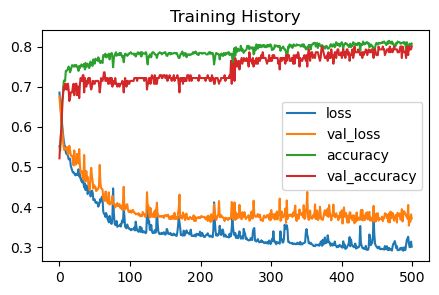

In [70]:
plt.figure(figsize=(5,3))
plt.title('Training History')

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')   # 'val_loss' 학습 안 된 데이터
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')  # 'val_accuracy' 학습 안 된 데이터

plt.legend()
plt.show()

In [71]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8000


[0.37176594138145447, 0.800000011920929]

In [72]:
# 추정결과 확인

_pred = model.predict(X)
pred = np.array( _pred>0.5, dtype=int)
pred[:5]

22/22 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [1],
       [1],
       [1]])

In [73]:
(pred>0.5).sum(), (pred<=0.5).sum()

(464, 236)

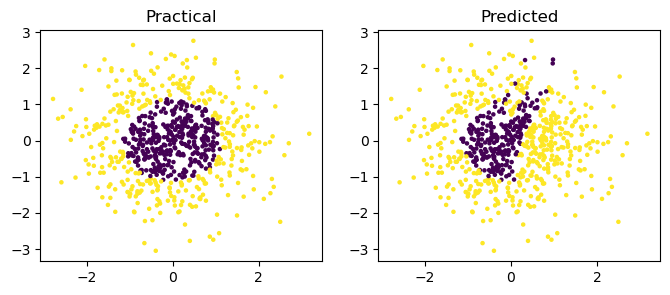

In [74]:
# 실제 분류와 모델이 추정한 분류의 비교
# subplot() 사용하기

# 강사님 버전


plt.figure(figsize=(8,3))

plt.subplot(121)
plt.title('Practical')
plt.scatter(X[:,0], X[:,1], c=y, s=5)

plt.subplot(122)
plt.title('Predicted')
plt.scatter(X[:,0], X[:,1], c=pred, s=5)

plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

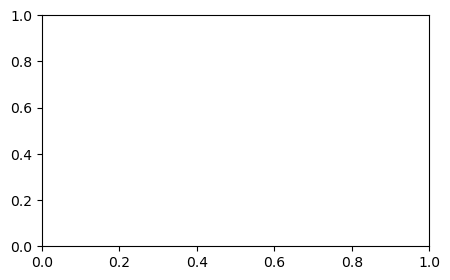

In [126]:
# 내가 한 것

# 실제 분류와 모델이 추정한 분류의 비교
# subplot() 사용하기



fig = plt.figure(figsize=(11, 3))  # 새로운 그림(Figure) 객체를 생성. 이 함수는 기본적으로 크기가 (6.4, 4.8) 인치인 그림을 생성
# 상하좌우로 차트를 나눠서 그릴 수 있는 것 중 121, 122는 상하좌우로 나누는 것.
# Figure 위에 subplot이나 차트가 그려질 때 해당 Figure의 크기 내에서 자동으로 위치가 조정
# subplot은 figure 안에 들어가는 서브 플롯(subplot)을 의미


# 학습 전 데이터
ax1 = fig.add_subplot(121)  # 한 행을 2개로 나눠서 첫 번째 차트를 그릴 수 있는 axis 객체
scatter1 = ax1.scatter(X[:,0], X[:,1], s=5, c=y, label='before_data')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes", loc="upper right")

#  bbox_to_anchor=(1.05, 1), bbox_transform=ax.transAxe => 범례 사이즈 조정

#ax1.add_artist(legend1)  # legend를 subplot에 추가
ax1.set_title("Before Classification")  # 서브 플롯에 제목 추가


# 학습 후 데이터

ax2 = fig.add_subplot(122)  # 한 행을 2개로 나눠서 두 번째 차트를 그릴 수 있는 axis 객체
scatter2 = ax2.scatter(X[:,0], X[:,1], s=5, c=pred)
legend2 = ax2.legend(*scatter2.legend_elements(), title="Predicted Classes", loc="upper right")
#ax2.add_artist(legend2)  #  범례(legend2)를 서브 플롯 ax2에 직접 추가하는 것을 의미. 범례가 서브 플롯 내에서 독립적으로 위치
ax2.set_title("Predicted Classification")  # 서브 플롯에 제목 추가


plt.tight_layout()  # 서브 플롯 간격 조정
plt.show()   # 현재 오류나서 동영상 확인해야 함

```
sigmoid 함수는 이진 분류(Binary Classification)에 주로 사용됩니다. 
이 함수는 입력값을 받아 0과 1 사이의 값을 출력합니다. 이때, 출력값은 한 개의 숫자로 나타납니다.
이 값은 해당 샘플이 어떤 클래스에 속할 확률을 나타냅니다. 보통 0.5를 임계값(threshold)으로 사용하여 0.5 이상이면 하나의 클래스로, 
0.5 미만이면 다른 클래스로 분류합니다.

따라서 sigmoid 함수를 사용하는 경우, 각 샘플에 대해 하나의 출력값이 나오며, 
이 값은 클래스 1에 속할 확률을 나타내는 것이 일반적입니다. 
이진 분류에서는 두 개의 클래스 중 하나를 선택하기 때문에 하나의 값을 가집니다.
```

# Multi-class Classification(다중 분류)
- 0~1 사이의 숫자는 2진 분류에서는 사용 가능
- 분류의 클래스 수만큼의 출력 노드(뉴런) 수가 발생
- 출력 노드의 출력값을 모두 합하면 1이 되어야 한다
- activation=softmax(출력층에 씀=> softmax를 쓰면 여러 개의 분류 결과로 나눌 수 있음), loss='categorical_crossentropy' 사용(다중 분류 손실함수는 무조건)
- 은닉층은 activation=relu
- 분류 클래스가 3이라면 label 컬럼에 0, 1, 2(데이터)가 포함되어 있다면 One-Hot-Encoding 필요
- pd.get_dummies(y), to_categorical(y, num_classes=3)  => 쪼개기 전 사용
- pd.get_dummies(y):DataFrame 리턴, to_categorical():ndarray 리턴
- softmax 함수는 클래스 수만큼의 숫자(확률)를 리턴하므로 그 중 가장 큰 값의 인덱스가 분류 클래스임(argmax이용해야 함)

# 다중 분류에 사용될 데이터 준비

In [78]:
X, y = make_blobs(n_samples=600, n_features=2, centers=3, random_state=0) #  y가 3개(centers=3을 줬으므로=> 세가지 분류 )

In [79]:
pd.Series(y).value_counts()

0    200
1    200
2    200
dtype: int64

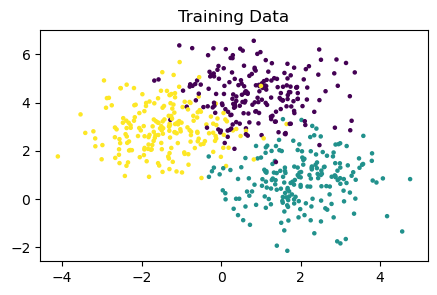

In [80]:
plt.figure(figsize=(5,3))
plt.title('Training Data')
plt.scatter(X[:,0], X[:,1], c=y, s=5)
plt.show()

# Label에 포함된 0,1,2는 범주형이므로 OHE처리한다
- One-Hot-Encoding 처리는 아래의 함수 중 하나를 사용
- pd.get_dummies(y)
- tensorflow.keras.utils.to_categorical(y)

In [81]:
from tensorflow.keras.utils import to_categorical     
arr_label = to_categorical(y)
arr_label    # OHE 결과를 ndarray 형식으로 리턴한다

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [82]:
df_label = pd.get_dummies(y)
df_label  # OHE 결과를 데이터프레임 형식으로리턴한다
# 원핫인코딩을 이용해 0,1,2를 컬럼으로 바꿔줌(분류 0,1,2가 수치는 아니므로/y의 범주이므로)

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
595,0,1,0
596,0,0,1
597,0,1,0
598,0,0,1


# 학습용/검증용 데이터 분리

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, arr_label, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 2), (120, 2), (480, 3), (120, 3))

In [84]:
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [85]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 2)                 6         
                                                                 
 dense_31 (Dense)            (None, 128)               384       
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 8)                 136       
                                                                 
 dense_36 (Dense)            (None, 4)                

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])   # 'mse' 추가 확인
# 다중 분류시 반드시 'categorical_crossentropy' 사용

In [87]:
# y의 범주를 원핫인코딩한 내용을 학습데이터와 범주용 데이터에 담은 뒤 학습시킴

hist = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 2s 18ms/step - loss: 1.0761 - accuracy: 0.5437 - mse: 0.2173 - val_loss: 1.0571 - val_accuracy: 0.5750 - val_mse: 0.2131
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 1.0197 - accuracy: 0.5854 - mse: 0.2050 - val_loss: 0.9906 - val_accuracy: 0.6000 - val_mse: 0.1987
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.9322 - accuracy: 0.5813 - mse: 0.1858 - val_loss: 0.9037 - val_accuracy: 0.6167 - val_mse: 0.1792
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8450 - accuracy: 0.6396 - mse: 0.1678 - val_loss: 0.8373 - val_accuracy: 0.5750 - val_mse: 0.1659
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8079 - accuracy: 0.6250 - mse: 0.1616 - val_loss: 0.8198 - val_accuracy: 0.6167 - val_mse: 0.1629
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7824 - accuracy: 0.6458 - mse: 0.1568 - val_loss: 0.8072 - 

15/15 [==============================] - 0s 6ms/step - loss: 0.5700 - accuracy: 0.8500 - mse: 0.1131 - val_loss: 0.7035 - val_accuracy: 0.7667 - val_mse: 0.1229
Epoch 49/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5758 - accuracy: 0.8354 - mse: 0.1147 - val_loss: 0.6953 - val_accuracy: 0.7750 - val_mse: 0.1202
Epoch 50/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5546 - accuracy: 0.8458 - mse: 0.1091 - val_loss: 0.6740 - val_accuracy: 0.8500 - val_mse: 0.1069
Epoch 51/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5216 - accuracy: 0.8438 - mse: 0.1004 - val_loss: 0.6775 - val_accuracy: 0.8500 - val_mse: 0.0999
Epoch 52/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4800 - accuracy: 0.8667 - mse: 0.0888 - val_loss: 0.6390 - val_accuracy: 0.8250 - val_mse: 0.0940
Epoch 53/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4572 - accuracy: 0.8542 - mse: 0.0850 - val_loss: 0.6438 - val_accu

15/15 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.8917 - mse: 0.0549 - val_loss: 0.9247 - val_accuracy: 0.8583 - val_mse: 0.0770
Epoch 96/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2927 - accuracy: 0.8896 - mse: 0.0550 - val_loss: 0.8705 - val_accuracy: 0.8583 - val_mse: 0.0688
Epoch 97/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2897 - accuracy: 0.8958 - mse: 0.0545 - val_loss: 0.9585 - val_accuracy: 0.8583 - val_mse: 0.0781
Epoch 98/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2989 - accuracy: 0.8896 - mse: 0.0566 - val_loss: 0.9038 - val_accuracy: 0.8583 - val_mse: 0.0694
Epoch 99/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2924 - accuracy: 0.8938 - mse: 0.0540 - val_loss: 0.8839 - val_accuracy: 0.8750 - val_mse: 0.0676
Epoch 100/100
15/15 [==============================] - 0s 9ms/step - loss: 0.2950 - accuracy: 0.8896 - mse: 0.0555 - val_loss: 0.8809 - val_acc

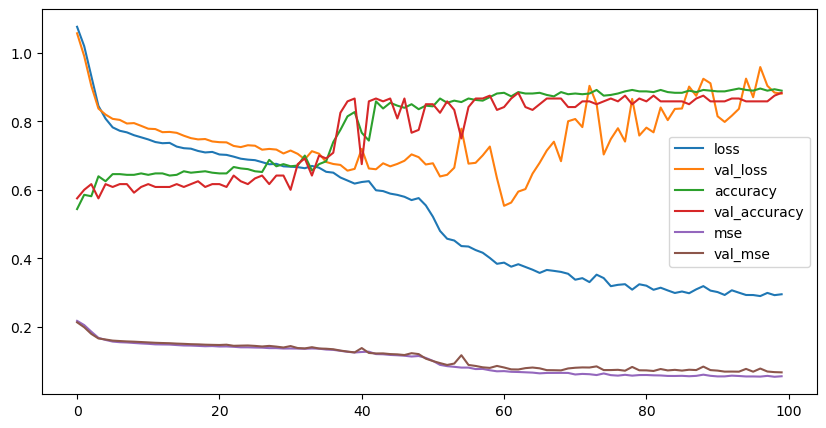

In [94]:
#softmax 함수는 클래스 수만큼의 숫자(확률)를 리턴하므로 그 중 가장 큰 값의 인덱스가 분류 클래스임(argmax이용해야 함)

plt.figure(figsize=(10,5))

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')   # 'val_loss' 학습 안 된 데이터
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')  # 'val_accuracy' 학습 안 된 데이터
plt.plot(hist.history['mse'], label='mse')
plt.plot(hist.history['val_mse'], label='val_mse')

plt.legend()
plt.show()

In [95]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.8809 - accuracy: 0.8833 - mse: 0.0669


[0.8809177279472351, 0.8833333253860474, 0.066900834441185]

In [96]:
_pred = model.predict(X)

19/19 [==============================] - 0s 1ms/step


In [97]:
_pred[:5]

array([[7.28014469e-01, 1.68194368e-01, 1.03791125e-01],
       [7.69322217e-01, 2.03038260e-01, 2.76394375e-02],
       [7.62241781e-01, 1.91068932e-01, 4.66892608e-02],
       [4.47595073e-03, 9.95524049e-01, 8.39010987e-35],
       [5.28652221e-04, 9.99471366e-01, 0.00000000e+00]], dtype=float32)

In [98]:
pred = _pred.argmax(axis=1)
pred[:5]

array([0, 0, 0, 1, 1], dtype=int64)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

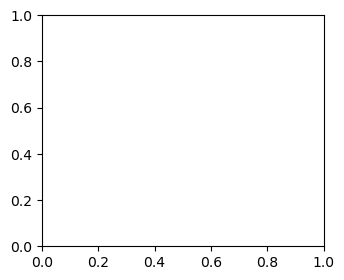

In [121]:
# 실제 분류와 모델이 추정한 분류의 비교
# subplot() 사용하기


# fig = plt.figure(figsize=(8, 3))  또는
plt.figure(figsize=(8,3))

# 학습 전 데이터
# ax1 = fig.add_subplot(121)  또는 
ax1 = plt.subplot(121)
scatter1 = ax1.scatter(X[:,0], X[:,1], c=y, s=5)
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)  # legend를 subplot에 추가



# 학습 후 데이터

# ax2 = fig.add_subplot(122)  또는
ax2 = plt.subplot(122)
scatter2 = ax2.scatter(X[:,0], X[:,1], c=pred, s=5)
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes")
ax2.add_artist(legend2)  #  범례(legend2)를 서브 플롯 ax2에 직접 추가하는 것을 의미. 범례가 서브 플롯 내에서 독립적으로 위치


plt.show()    # 출력시 오류 나고 있음

# 실제 데이터 이용해 데이터 분류

# Label 컬럼이 문자열로 표기된 경우의 전처리
- iris.csv
- pd.get_dummies()를 사용하여 One-Hot-Encoding 해야 한다

In [100]:
df= pd.read_csv('https://cwisky.github.io/public/Iris.csv', index_col='Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [101]:
# 내 버전

y=df['Species']
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [102]:
df_label = pd.get_dummies(y)
df_label 

,Iris-setosa,Iris-versicolor,Iris-virginica
Id,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
146,0,0,1
147,0,0,1
148,0,0,1


In [103]:
# 원핫인코딩을 get_dummies를 이용하여 진행 
df_label = pd.get_dummies(y)
df_label 

,Iris-setosa,Iris-versicolor,Iris-virginica
Id,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
146,0,0,1
147,0,0,1
148,0,0,1


In [104]:
from tensorflow.keras.utils import to_categorical
# arr_label = to_categorical(df_label)  => pd.get_dummies(y) 사용했으므로 안 씀
arr_label = df_label.values # numpy 배열로 변환
arr_label[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

```
to_categorical 함수는 정수형 데이터를 원-핫 인코딩으로 변환하는 함수임. 
따라서 to_categorical 함수는 정수형 데이터에 사용하는 것이 일반적.

여기서 df_label은 이미 get_dummies 함수를 사용하여 문자열 데이터를 원-핫 인코딩한 데이터프레임임. 
따라서 이미 원-핫 인코딩이 된 상태이므로 to_categorical 함수를 다시 적용할 필요가 없음.

정리하면, arr_label = df_label.values를 사용하여 데이터프레임을 넘파이 배열로 변환하면 
이미 원-핫 인코딩된 형태이므로 따로 to_categorical 함수를 사용할 필요가 없음
문자열을 숫자로 변환하려면 to_categorical(y)와 get_dummies(y) 중 하나만 사용
둘 다 원-핫 인코딩을 수행하는 기능을 가지고 있기 때문에 둘 중 하나만 사용. 
둘 다 동일한 결과를 얻을 수 있으므로, 어떤 것을 사용할지는 개인의 선호나 코드 베이스에 맞게 선택
```

In [105]:
X = df.drop('Species', axis=1)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, arr_label, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [107]:
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [108]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 128)               640       
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 8)                 136       
                                                                 
 dense_44 (Dense)            (None, 3)                

In [109]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])   # 'mse' 추가 확인

In [110]:
hist = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 1s 83ms/step - loss: 1.1031 - accuracy: 0.3333 - mse: 0.2232 - val_loss: 1.1299 - val_accuracy: 0.2000 - val_mse: 0.2289
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0919 - accuracy: 0.3667 - mse: 0.2202 - val_loss: 1.1545 - val_accuracy: 0.2000 - val_mse: 0.2338
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0860 - accuracy: 0.3667 - mse: 0.2186 - val_loss: 1.1555 - val_accuracy: 0.2000 - val_mse: 0.2339
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 1.0812 - accuracy: 0.3667 - mse: 0.2174 - val_loss: 1.1487 - val_accuracy: 0.2000 - val_mse: 0.2325
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0777 - accuracy: 0.3667 - mse: 0.2167 - val_loss: 1.1423 - val_accuracy: 0.2000 - val_mse: 0.2311
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 1.0740 - accuracy: 0.3667 - mse: 0.2159 - val_loss: 1.1348 - val_acc

4/4 [==============================] - 0s 13ms/step - loss: 0.2939 - accuracy: 0.9167 - mse: 0.0503 - val_loss: 0.2826 - val_accuracy: 0.9667 - val_mse: 0.0433
Epoch 49/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2749 - accuracy: 0.9333 - mse: 0.0474 - val_loss: 0.3729 - val_accuracy: 0.8667 - val_mse: 0.0699
Epoch 50/100
4/4 [==============================] - 0s 23ms/step - loss: 0.2936 - accuracy: 0.9333 - mse: 0.0503 - val_loss: 0.2487 - val_accuracy: 0.9667 - val_mse: 0.0364
Epoch 51/100
4/4 [==============================] - 0s 24ms/step - loss: 0.2357 - accuracy: 0.9333 - mse: 0.0393 - val_loss: 0.2619 - val_accuracy: 0.9333 - val_mse: 0.0426
Epoch 52/100
4/4 [==============================] - 0s 16ms/step - loss: 0.2173 - accuracy: 0.9417 - mse: 0.0352 - val_loss: 0.2154 - val_accuracy: 0.9667 - val_mse: 0.0309
Epoch 53/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2131 - accuracy: 0.9583 - mse: 0.0339 - val_loss: 0.2063 - val_accuracy: 

4/4 [==============================] - 0s 22ms/step - loss: 0.1478 - accuracy: 0.9500 - mse: 0.0296 - val_loss: 0.0827 - val_accuracy: 0.9667 - val_mse: 0.0151
Epoch 96/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1016 - accuracy: 0.9750 - mse: 0.0198 - val_loss: 0.1277 - val_accuracy: 0.9667 - val_mse: 0.0230
Epoch 97/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1121 - accuracy: 0.9250 - mse: 0.0247 - val_loss: 0.0874 - val_accuracy: 0.9667 - val_mse: 0.0149
Epoch 98/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0950 - accuracy: 0.9500 - mse: 0.0198 - val_loss: 0.1043 - val_accuracy: 0.9667 - val_mse: 0.0196
Epoch 99/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1018 - accuracy: 0.9667 - mse: 0.0204 - val_loss: 0.0892 - val_accuracy: 0.9667 - val_mse: 0.0170
Epoch 100/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0930 - accuracy: 0.9500 - mse: 0.0189 - val_loss: 0.0835 - val_accuracy:

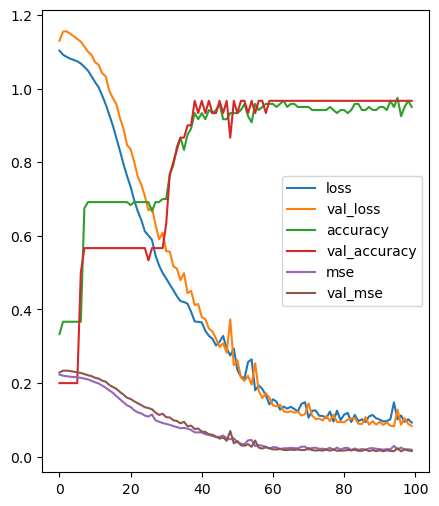

In [111]:

plt.figure(figsize=(5,6))

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')   # 'val_loss' 학습 안 된 데이터
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')  # 'val_accuracy' 학습 안 된 데이터
plt.plot(hist.history['mse'], label='mse')
plt.plot(hist.history['val_mse'], label='val_mse')

plt.legend()
plt.show()


In [112]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.0835 - accuracy: 0.9667 - mse: 0.0156


[0.08352459222078323, 0.9666666388511658, 0.015635346993803978]

In [113]:
_pred = model.predict(X)

5/5 [==============================] - 0s 2ms/step


In [114]:
pred = _pred.argmax(axis=1)
pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [115]:
X = X.values  # X가 데이터프레임이라서 X[:,0] 이렇게 쓸 거면 pandas DataFrame을 numpy 배열로 변환해야 시각화 가능

In [116]:
from sklearn.preprocessing import LabelEncoder
# 원본 데이터가 숫자로 전달되고 있어서 LabelEncoder를 사용하여 Species 열의 문자열 레이블을 숫자로 변환해야 시각화 가능
le = LabelEncoder() 
y_encoded = le.fit_transform(df['Species'])  # 문자열을 숫자로 변환

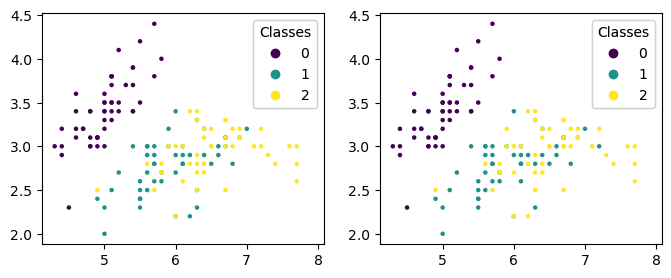

In [117]:
# 실제 분류와 모델이 추정한 분류의 비교
# subplot() 사용하기


fig = plt.figure(figsize=(8, 3))  # 새로운 그림(Figure) 객체를 생성. 이 함수는 기본적으로 크기가 (6.4, 4.8) 인치인 그림을 생성
# 상하좌우로 차트를 나눠서 그릴 수 있는 것 중 121, 122는 상하좌우로 나누는 것.
# Figure 위에 subplot이나 차트가 그려질 때 해당 Figure의 크기 내에서 자동으로 위치가 조정
# subplot은 figure 안에 들어가는 서브 플롯(subplot)을 의미


# 학습 전 데이터
ax1 = fig.add_subplot(121)  # 한 행을 2개로 나눠서 첫 번째 차트를 그릴 수 있는 axis 객체
scatter1 = ax1.scatter(X[:,0], X[:,1], c=y_encoded, s=5)
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes", loc="upper right")
ax1.add_artist(legend1)  # legend를 subplot에 추가



# 학습 후 데이터

ax2 = fig.add_subplot(122)  # 한 행을 2개로 나눠서 두 번째 차트를 그릴 수 있는 axis 객체
scatter2 = ax2.scatter(X[:,0], X[:,1], c=pred, s=5)
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes", loc="upper right")
ax2.add_artist(legend2)  #  범례(legend2)를 서브 플롯 ax2에 직접 추가하는 것을 의미. 범례가 서브 플롯 내에서 독립적으로 위치


plt.show()

### 학습용/검증용 데이터 분리

In [ ]:
# 위 내용 문제 강사님 버전

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, arr_label, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
model = Sequential()
model.add ( Dense(2, input_dim=2, activation='relu'))
model.add ( Dense(128, activation='relu'))
model.add ( Dense(64, activation='relu'))
model.add ( Dense(32, activation='relu'))
model.add ( Dense(16, activation='relu'))
model.add ( Dense(8, activation='relu'))
model.add ( Dense(4, activation='relu'))
model.add ( Dense(3, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
                                         metrics=['accuracy','mse'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['mse'], label='mse')
plt.plot(hist.history['val_mse'], label='val_mse')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
_pred = model.predict(X)

In [ ]:
_pred[:5]

In [ ]:
pred = _pred.argmax(axis=1)
pred[:5]

In [ ]:
plt.figure(figsize=(8,3))
ax1 = plt.subplot(121)
scatter1 = ax1.scatter(X[:,0], X[:,1], c=y, s=5)
legend1 = ax1.legend(*scatter1.legend_elements(), title='Classes')
ax1.add_artist(legend1)

ax2 = plt.subplot(122)
scatter2 = ax2.scatter(X[:,0], X[:,1], c=pred, s=5)
legend2 = ax2.legend(*scatter2.legend_elements(), title='Classes')
ax2.add_artist(legend2)

plt.show()

In [ ]:
_pred = model.predict([[2,2]])
_pred

In [ ]:
_pred.argmax()   # 1

# Label 컬럼이 문자열로 표기된 경우의 전처리
- Iris.csv
- pd.get_dummies()를 사용하여 One-Hot-Encoding 해야 한다

In [ ]:
# 위 내용 문제 강사님 버전

In [ ]:
df = pd.read_csv('http://cwisky.github.io/public/Iris.csv', index_col='Id')
df

In [ ]:
df_label_ohe = pd.get_dummies(df['Species'])
df_label_ohe

In [ ]:
X = df.values[:,:4]
y = df.values[:,4]
X.shape, y.shape

In [ ]:
X.dtype, y.dtype

In [ ]:
y = np.asarray(y).astype('str')

In [ ]:
X.dtype, y.dtype

In [ ]:
X[:5]

In [ ]:
y[:5]

In [ ]:
y_ohe = pd.get_dummies(y)  # DataFrame 리턴
y_ohe

In [ ]:
columns = y_ohe.columns
columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
                                         metrics=['accuracy','mse'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=500, verbose=1, validation_data=(X_test, y_test))

In [ ]:
hist.history.keys()

In [ ]:
plt.figure(figsize=(10,3))
plt.title('Train History')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['mse'], label='mse')
plt.plot(hist.history['val_mse'], label='val_mse')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
_pred = model.predict(X)
_pred

In [ ]:
pred = _pred.argmax(axis=1)
pred[:5]

In [ ]:
# 필요시 그룹 번호를 문자열 형태로 변환
columns[pred]    # fancy indexing

In [ ]:
cluster_id = model.predict(X_test[0].reshape(1,-1))
cluster_id   # array([[2.8090458e-04, 4.9915310e-02, 9.4980377e-01]], dtype=float32)
columns[cluster_id[0].argmax()]   # 'Iris-virginica'

In [ ]:
df.iloc[:,4]

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_enc = LabelEncoder()
lb_enc.fit(df.iloc[:,4])
encoded = lb_enc.transform(df.iloc[:,4])   # 차트에 색상 표현을 위해 문자열 라벨을 숫자로 변환함

plt.figure(figsize=(8,3))
ax1 = plt.subplot(121)
plt.title('Practical')
scatter1 = ax1.scatter(df.iloc[:,0],df.iloc[:,2], c=encoded, s=5)
legend1 = ax1.legend(*scatter1.legend_elements(), title='Classes')
t_list = legend1.get_texts()
t_list[0].set_text(columns[0])
t_list[1].set_text(columns[1])
t_list[2].set_text(columns[2])
ax1.add_artist(legend1)

ax2 = plt.subplot(122)
plt.title('Predicted')
scatter2 = ax2.scatter(df.iloc[:,0],df.iloc[:,2], c=pred, s=5)
legend2 = ax2.legend(*scatter1.legend_elements(), title='Classes')
t_list = legend2.get_texts()
t_list[0].set_text(columns[0])
t_list[1].set_text(columns[1])
t_list[2].set_text(columns[2])
ax2.add_artist(legend2)

plt.show()

## Visual Python을 사용하여
- 데이터 전처리/분석/시각화 쉽게 하기
- 대부분의 데이터 전처리 및 ML 가능
- Tensorflow/Python 추가 중
- 빅데이터 취업시 사용할 줄 알면 유리